<a href="https://colab.research.google.com/github/divyakumar95/emotionAnalysis/blob/main/ML_CA_02_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Learing CA-02


### Question 1

Use a real-world dataset (i.e. relational, text, image, video, voice files), prepare the dataset for modelling, consider one categorical variable in the dataset, and apply the classification task. To do so:  

* Provide the functional form of the predictive model for each algorithm.

* Train each model using different ratios of the trainset and visualize the performance of models using accuracy (y -axis) in terms of different ratio of trainsets (x-axis). Elaborate on the insights.

* Apply ensemble methods (bagging, boosting, stacking) on the base models, evaluate the performance of each ensemble technique in 100 Monte Carlo runs and visualize the performance of models using Boxplot.

* Select the best classifier and elaborate on its advantages and limitations.

### Problem Statement

Using text data to detect emotions of user

## Resouces and references

* https://scikit-learn.org/stable/supervised_learning.html

### Data Sources

* https://www.kaggle.com/parulpandey/emotion-dataset/download
* https://drive.google.com/drive/u/1/folders/1oRZNWkOLESPNiW-nLZrh-wNe2G7eS9ln

### Text to Number conversion Sources

* https://thecleverprogrammer.com/2021/04/17/convert-text-into-numerical-data-using-python/

### Importing Data - Source code

* https://colab.research.google.com/notebooks/io.ipynb

## Data Understanding

Mount drive to colab to use dataset

In [ ]:
## To run on Google colab
try:
    from google.colab import drive
    drive.mount('/content/drive')
except Exception as E:
    print(E)

No module named 'google.colab'


### Data Files path

* https://drive.google.com/file/d/1JfvMAwFgEkEySAJEzi1rhzDt7xOknoWV/view?usp=sharing

In [2]:
#CSV file path on local or 
Drive_data = '/content/drive/MyDrive/Text_data/training.csv'
local_data = 'Data/training.csv'

### Import required libraries/modules  

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import plotly.io as pio
pio.renderers.default = 'iframe_connected'

### Load Dataset

In [4]:
import os 
if os.path.exists(Drive_data):
    data = pd.read_csv(Drive_data)
else:
    data = pd.read_csv(local_data)

## Data Preparation

### Define output labels

* 0: Sadness
* 1: Joy
* 2: Love
* 3: Anger
* 4: Fear
* 5: Surprise

Total 6 different classes

In [5]:
labels_dict = {0:'sadness', 1:'joy', 2:'love', 3:'anger', 4:'fear', 5:'surprise'}
data['description'] = data['label'].map(labels_dict )
data.head()

,text,label,description
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [6]:
data['description'].value_counts(normalize=True)

joy         0.335125
sadness     0.291625
anger       0.134937
fear        0.121063
love        0.081500
surprise    0.035750
Name: description, dtype: float64

### Vectorize text to numerical Data

Source - https://thecleverprogrammer.com/2021/04/17/convert-text-into-numerical-data-using-python/

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words='english')

In [8]:
new_vect = vect.fit_transform(data['text'].values)
print(vect.get_feature_names()[:10])

['ability', 'able', 'absolutely', 'abused', 'accept', 'acceptable', 'accepted', 'accomplished', 'ache', 'aching']


### Define X and y Variable

Defining input and output variables 

In [9]:
X = new_vect.toarray()
y = data['label']

In [10]:
print("X Shape",X.shape)
print("Y Shape",y.shape)

X Shape (16000, 1500)
Y Shape (16000,)


In [11]:
from collections import Counter
Counter(y)

Counter({0: 4666, 3: 2159, 2: 1304, 5: 572, 4: 1937, 1: 5362})

## Modeling

### Import required Machine learing Models

In [12]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier # decision tee algorithm for classification
from sklearn.naive_bayes import CategoricalNB, GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR,SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_roc_curve
import pickle
import timeit, time

### Define Models - Base classifiers

In [13]:
def base_models():
  models = dict()
  models['lr'] = LogisticRegression(solver='lbfgs', max_iter=500)
  models['svm_Linear'] = SVC(kernel='linear')
  models['svm_Polly'] = SVC(kernel='poly')
  models['svm_RBF'] = SVC(kernel='rbf')
  models['svm_Sigmoid'] = SVC(kernel='sigmoid')
  models['dt_ent'] = DecisionTreeClassifier(criterion='entropy')
  models['dt_gini'] = DecisionTreeClassifier(criterion='gini')
  models['rf'] = RandomForestClassifier(n_estimators=130, criterion='entropy')
  return models

### Def model evaluation 

In [70]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

def evaluate_model_Multi(model, X, y, mc):
  acc = [] ### Blank vector
  f = []
  prec = []
  rec = []
  single = timeit.default_timer()
  for i in range(mc):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=i)# split dataset
    #dt = make_pipeline(StandardScaler(),model) #pipeline to reduce computation time
    dt = model.fit(X_train,y_train) # fit the model
    YPred = dt.predict(X_test) # predict
    a = accuracy_score(y_test,YPred) # compute accuracy
    acc.append(a) # append accuracy
    f1 = f1_score(y_test, YPred, average='weighted')
    precision = precision_score(y_test, YPred, average='weighted')
    recall = recall_score(y_test, YPred, average='weighted')
    f.append(f1)
    prec.append(precision)
    rec.append(recall)
    timed = timeit.default_timer() - single
    return np.mean(acc), dt, np.mean(recall), np.mean(prec),np.mean(f), np.mean(timed)

### Checking the best base model 

In [ ]:
from numpy import mean, std
import warnings
warnings.filterwarnings("ignore")
# get the models to evaluate
models = base_models()
# evaluate the models and store results
Single_results, Single_names = list(), list()
Single_run = 1
start_single = timeit.default_timer()
for name, model in models.items():
	scores, mod, prec, recall,fscore, timed = evaluate_model_Multi(model,X,y,Single_run) #,X_over,y_over)#, X, y)
	Single_results.append(scores)
	Single_names.append(name)
	#filename = 'Models/'+name+'.pkl'
	#pickle.dump(mod, open(filename, 'wb'))
	print(name,'-- accuracy:', mean(scores), '-- Deviation',std(scores),'-- Precision ', mean(prec),'-- Recall', mean(recall),'-- Fscore:', mean(fscore))
print('Total time for single run to check models: ', timeit.default_timer() - start_single) 

lr -- accuracy: 0.87125 -- Deviation 0.0 -- Precision  0.87125 -- Recall 0.8712349502909648 -- Fscore: 0.8704569731892718
svm_Linear -- accuracy: 0.860625 -- Deviation 0.0 -- Precision  0.860625 -- Recall 0.8612831942688906 -- Fscore: 0.8602931033837103
svm_Polly -- accuracy: 0.61 -- Deviation 0.0 -- Precision  0.61 -- Recall 0.6806324645530768 -- Fscore: 0.5430535121814706
svm_RBF -- accuracy: 0.836875 -- Deviation 0.0 -- Precision  0.836875 -- Recall 0.8445274107306971 -- Fscore: 0.8326791890241033
svm_Sigmoid -- accuracy: 0.775 -- Deviation 0.0 -- Precision  0.775 -- Recall 0.7790720035409707 -- Fscore: 0.7738120028948207
dt_ent -- accuracy: 0.8278125 -- Deviation 0.0 -- Precision  0.8278125 -- Recall 0.8302841071630145 -- Fscore: 0.8275379273407616
dt_gini -- accuracy: 0.8134375 -- Deviation 0.0 -- Precision  0.8134375 -- Recall 0.8172844337412661 -- Fscore: 0.812884332772516
rf -- accuracy: 0.8684375 -- Deviation 0.0 -- Precision  0.8684375 -- Recall 0.8698934978526546 -- Fscore: 

Plot the models accuracy for better insights

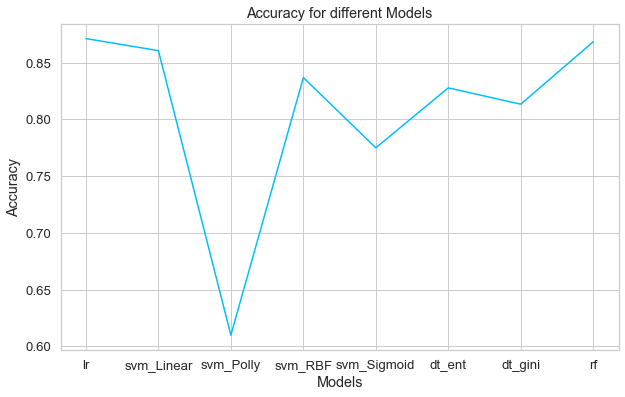

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(Single_names,Single_results)
plt.ylabel('Accuracy'); plt.xlabel('Models'); plt.title('Accuracy for different Models');
plt.show()

* ***From the Plot Logistic Regression and Random forest classifier performed better than other models***

### Ensemble Methods

* Using Logistic Regression and Random forest classifiers as the base model
* Selecting based on the previous metric

#### Define Stacking model

In [68]:
def get_stacking():
	# define the base models: level0 models
	level0 = list()
	level0.append(('lr', LogisticRegression(solver='lbfgs', max_iter=500)))
	level0.append(('Rand', RandomForestClassifier(n_estimators=130, criterion='entropy')))
	#level0.append(('svm', SVC(kernel='linear')))
	# define meta learner model: level 1
	level1 = LogisticRegression(solver='lbfgs', max_iter=500)
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model

#### Define Ensemble function 

In [69]:
def ensemble_model():
  lr = LogisticRegression(solver='lbfgs', max_iter=500)               #Base model
  rf = RandomForestClassifier(n_estimators=120, criterion='entropy')    #Base model
  models = dict()
  models['lr'] = LogisticRegression(solver='lbfgs', max_iter=500)
  models['rf'] = RandomForestClassifier(n_estimators=120, criterion='entropy')
  models['bagging_Lr'] = BaggingClassifier(base_estimator=lr, n_estimators=50, max_samples=0.8, max_features=0.8)
  models['bagging_Rf'] = BaggingClassifier(base_estimator=rf, n_estimators=50, max_samples=0.8, max_features=0.8)
  models['adaboost_lr'] = AdaBoostClassifier(base_estimator=lr, n_estimators=800)
  #models['adaboost_RF'] = AdaBoostClassifier(base_estimator=rf, n_estimators=800)
  models['stacking'] = get_stacking()
  return models

#### Model Evaluation

Using 100 Monte Carlo runs

In [71]:
from numpy import mean, std
import warnings
warnings.filterwarnings("ignore")

# get the models to evaluate
models = ensemble_model()
# evaluate the models and store results
mul_results, mul_names = list(), list()
number_of_runs = 100
start_multi = time.time()
for name, model in models.items():
	scores, mod, prec, recall, fscore, timed = evaluate_model_Multi(model, X, y, number_of_runs) #,X_over,y_over)#, X, y)
	mul_results.append(scores)
	mul_names.append(name)
	filename = 'Models/'+name+'.pkl'
	pickle.dump(mod, open(filename, 'wb'))
	print(name,'-- accuracy:', mean(scores), '-- Deviation',std(scores),'-- Precision ', mean(prec),'-- Recall', mean(recall),'-- Fscore:', mean(fscore))
print('Total time to run 100 Monte carlo runs: ', time.time() - start_multi) 

lr -- accuracy: 0.87125 -- Deviation 0.0 -- Precision  0.87125 -- Recall 0.8712349502909648 -- Fscore: 0.8704569731892718
rf -- accuracy: 0.8715625 -- Deviation 0.0 -- Precision  0.8715625 -- Recall 0.8730719394735402 -- Fscore: 0.8720274934020034
bagging_Lr -- accuracy: 0.87 -- Deviation 0.0 -- Precision  0.87 -- Recall 0.8704134293554157 -- Fscore: 0.8679641834776777
bagging_Rf -- accuracy: 0.8696875 -- Deviation 0.0 -- Precision  0.8696875 -- Recall 0.8700790688775655 -- Fscore: 0.8696695191463604
adaboost_lr -- accuracy: 0.7890625 -- Deviation 0.0 -- Precision  0.7890625 -- Recall 0.8070980370125586 -- Fscore: 0.7800443208843663
stacking -- accuracy: 0.8790625 -- Deviation 0.0 -- Precision  0.8790625 -- Recall 0.8784870890792686 -- Fscore: 0.8785583830821986
Total time to run 100 Monte carlo runs:  2182.702778816223


Plot the accuracy to model metric to evaluate performance 

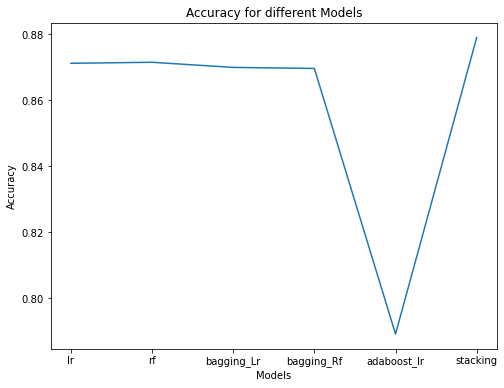

In [72]:
plt.figure(figsize=(8, 6))
plt.plot(mul_names, mul_results)
plt.ylabel('Accuracy'); plt.xlabel('Models'); plt.title('Accuracy for different Models');
plt.show()

* ***From the Above Graph Linear Regression and Stacking approch gave the best Performance***

Define Cross Validation Model Evaluation

In [ ]:
def evaluate_model_cross(model, X, y):
	cv = 4
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv)
	return scores

Model Evaluation from cross validation Scores

In [ ]:
from numpy import mean, std
# get the models to evaluate
models = ensemble_model()
# evaluate the models and store results
cross_results, cross_names = list(), list()
for name, model in models.items():
	scores = evaluate_model_cross(model, X, y)
	cross_results.append(scores)
	cross_names.append(name)
	#filename = 'Models/'+name+'_cv.pkl'
	#pickle.dump(model, open(filename, 'wb'))
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>lr 0.873 (0.007)
>rf 0.866 (0.005)
>bagging_Lr 0.873 (0.007)
>bagging_Rf 0.867 (0.006)
>adaboost_lr 0.789 (0.007)
>stacking 0.876 (0.005)


Calculate the accuracy to model evaluation performance

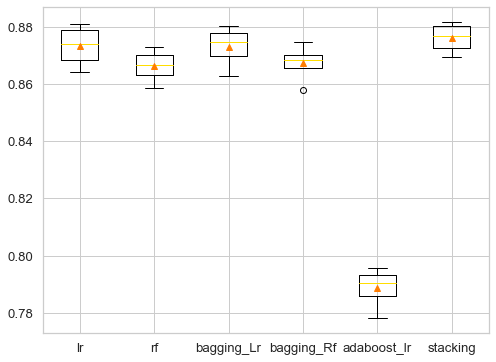

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(cross_results, labels=cross_names, showmeans=True)
plt.ylabel('Accuracy'); plt.xlabel('Models'); plt.title('Accuracy for different Models');
plt.show()

* ***From the Graph above Logistic Regression and Stacking methord performed better compared to other with high accuracy and deviation in Accuracy***

## Hyperparameter Tuning

### Different Test-Train set evaluation

In [60]:
import numpy as np

def testmodels():
    models = dict()
    models['LR'] = LogisticRegression(solver='lbfgs', max_iter=500)
    models['svm_Linear'] = SVC(kernel='linear')
    models['svm_Polly'] = SVC(kernel='poly')
    models['svm_RBF'] = SVC(kernel='rbf')
    models['svm_Sigmoid'] = SVC(kernel='sigmoid')
    models['dt_ent'] = DecisionTreeClassifier(criterion='entropy')
    models['dt_gini'] = DecisionTreeClassifier(criterion='gini')
    models['rf'] = RandomForestClassifier(n_estimators=130, criterion='entropy')
    return models
  
tsize = [0.2,0.3,0.4,0.5,0.6]
models = testmodels()
models_acc = {}
for name, model in models.items():
    tsize_acc = {}
    for i in tsize:
        acc = []
        for j in range(1):
            X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=i, random_state = j)
            mod = model
            mod.fit(X_train, y_train)
            mod_pred = mod.predict(X_test)
            accuracy = accuracy_score(y_test,mod_pred)
            acc.append(accuracy)
        tsize_acc.update({i: np.mean(acc)})
    models_acc.update({name:[tsize_acc]})
print(models_acc)

{'LR': [{0.2: 0.87125, 0.3: 0.8710416666666667, 0.4: 0.87234375, 0.5: 0.867875, 0.6: 0.8617708333333334}], 'svm_Linear': [{0.2: 0.860625, 0.3: 0.861875, 0.4: 0.85953125, 0.5: 0.85125, 0.6: 0.8530208333333333}], 'svm_Polly': [{0.2: 0.61, 0.3: 0.5839583333333334, 0.4: 0.56921875, 0.5: 0.5475, 0.6: 0.4759375}], 'svm_RBF': [{0.2: 0.836875, 0.3: 0.8333333333333334, 0.4: 0.828125, 0.5: 0.8185, 0.6: 0.8019791666666667}], 'svm_Sigmoid': [{0.2: 0.775, 0.3: 0.7908333333333334, 0.4: 0.80171875, 0.5: 0.8095, 0.6: 0.8005208333333333}], 'dt_ent': [{0.2: 0.82, 0.3: 0.8122916666666666, 0.4: 0.8146875, 0.5: 0.805625, 0.6: 0.8040625}], 'dt_gini': [{0.2: 0.8175, 0.3: 0.815625, 0.4: 0.80515625, 0.5: 0.81125, 0.6: 0.8103125}], 'rf': [{0.2: 0.8715625, 0.3: 0.870625, 0.4: 0.86921875, 0.5: 0.8585, 0.6: 0.8470833333333333}]}


Plot the metric on the graph for better visualization 

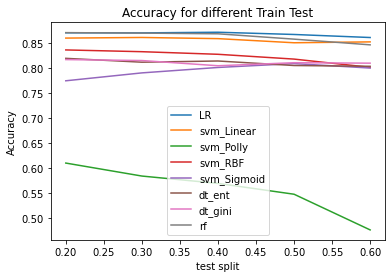

In [73]:
c = 0
for i,j in models_acc.items():
    tsize_plt = models_acc[i][c]
    plt.plot(*zip(*sorted(tsize_plt.items())),label = i) #, linestyle="-")
    plt.ylabel('Accuracy'); plt.xlabel('test split'); plt.title('Accuracy for different Train Test');
plt.legend()
plt.show()

* ***From the Graph different models perform differntly for differnet Test_size. But we can consider Logistic Regression with test size 0.2 as it out performed other models***

### Evaluating with different Cross validation n_estimators

In [63]:
num_est = np.arange(2,16,4)
lr_cv_mean = []
lr_cv_std = []
for n_est in num_est:
    lr = LogisticRegression(solver='lbfgs', max_iter=500) 
    scores = cross_val_score(lr, X, y, cv=n_est, scoring='accuracy')
    lr_cv_mean.append(scores.mean())
    lr_cv_std.append(scores.std())

Plot the performance for different Values of Estimators

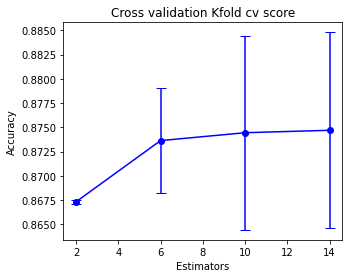

In [64]:
plt.figure(figsize=(5, 4))
plt.errorbar(num_est, lr_cv_mean, yerr=lr_cv_std,c='blue', fmt='-o', capsize=5)
plt.ylabel('Accuracy'); plt.xlabel('Estimators'); plt.title('Cross validation Kfold cv score');
plt.show()

* ***From the graph 4 number of estimators perfomed better because of less deviation in Accuracy***

### Evaluate with different N-Estimators for Random forest Regressor

In [ ]:
num_est = np.arange(10,150,10)
bg_clf_cv_mean = []
bg_clf_cv_std = []
for n_est in num_est:
    mod = RandomForestClassifier(n_estimators = n_est, criterion='entropy')
    mod.fit(X_train, y_train)
    mod_pred = mod.predict(X_test)
    accuracy = accuracy_score(y_test,mod_pred)
    bg_clf_cv_mean.append(accuracy.mean())
    bg_clf_cv_std.append(accuracy.std())

Plot the performace by accuracy and different n estimators

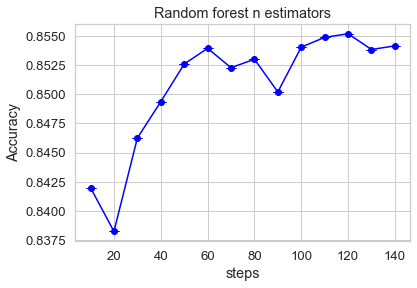

In [ ]:
plt.figure(figsize=(6, 4))
plt.errorbar(num_est, bg_clf_cv_mean, yerr=bg_clf_cv_std,c='blue', fmt='-o', capsize=5)
plt.ylabel('Accuracy'); plt.xlabel('steps'); plt.title('Random forest n estimators');
plt.show()

* ***From the graph 120 number of estimators for Random forest performs better compared to other values***

Evaluate with differnet n-estimators for Ada Boost 

In [ ]:
lr = LogisticRegression(solver='lbfgs', max_iter=500) 

num_ada_est = np.arange(100,1000,100)
ada_clf_cv_mean = []
ada_clf_cv_std = []
for n_est in num_ada_est:
    mod = AdaBoostClassifier(base_estimator=lr, n_estimators=n_est)
    mod.fit(X_train, y_train)
    mod_pred = mod.predict(X_test)
    accuracy = accuracy_score(y_test,mod_pred)
    ada_clf_cv_mean.append(accuracy.mean())
    ada_clf_cv_std.append(accuracy.std())

Plot the performace by accuracy and different n estimators

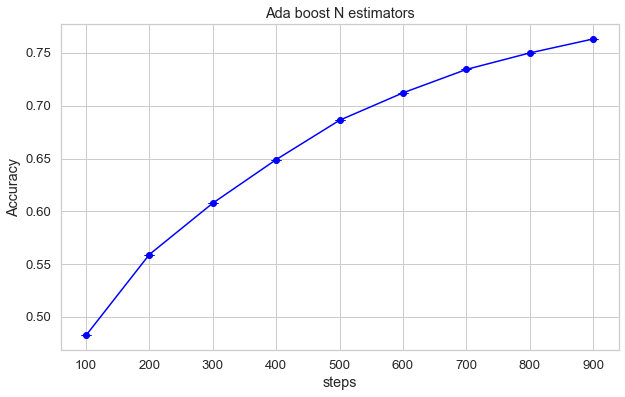

In [ ]:
plt.figure(figsize=(10, 6))
plt.errorbar(num_ada_est, ada_clf_cv_mean, yerr=ada_clf_cv_std,c='blue', fmt='-o', capsize=5)
plt.ylabel('Accuracy'); plt.xlabel('steps'); plt.title('Ada boost N estimators');
plt.show()

* ***From the evaluation 900 number of estimators performed better comparted to other***

## Best Classifier

### After validating the results the best classifier for our data set is  

* Logistic Regression and Stacking classifiers are the two best classifiers for our dataset.

* Logistic Regression could be better classifier compared to Stacking classifier due to the below advantages and limitaitons.

## Advantages and Limitations 

* Advatage is the performace is better compared to any of the other model with very low deviation in accuracy.

* Time consumed to train Stacking classifier is much higher compared to logistic regression which have almost same performance of stacking classifier.

* The weight of Stacking classifier is much higher compared to logistic regression.